In [3]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


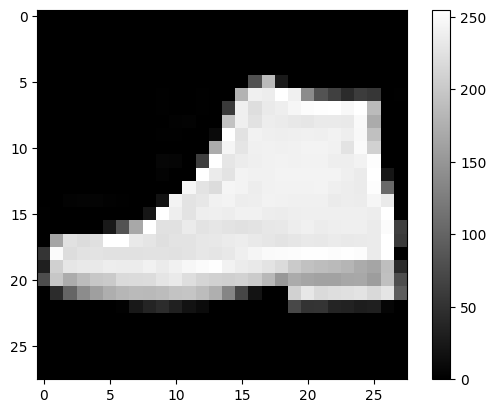

In [11]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

#plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.show()

In [17]:
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  26,  10,   5,   5,   5,
          3,   4,   4,   3,   6,  24,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 196, 203, 201, 234, 237,
        233, 231, 229, 196, 190, 207,  73,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5, 195, 199, 194, 189, 192,
        188, 186, 186, 189, 180, 194,  67,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  32, 202, 195, 193, 186, 193,
        187, 186, 183, 189, 175, 197, 105,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  53, 208, 191, 190, 183, 190,
        188, 186, 184, 186, 167, 195, 132,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 210, 191, 190, 184, 191,
        189, 184, 184, 185, 169, 190, 157,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [19]:
number_of_classes = train_labels.max() + 1
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

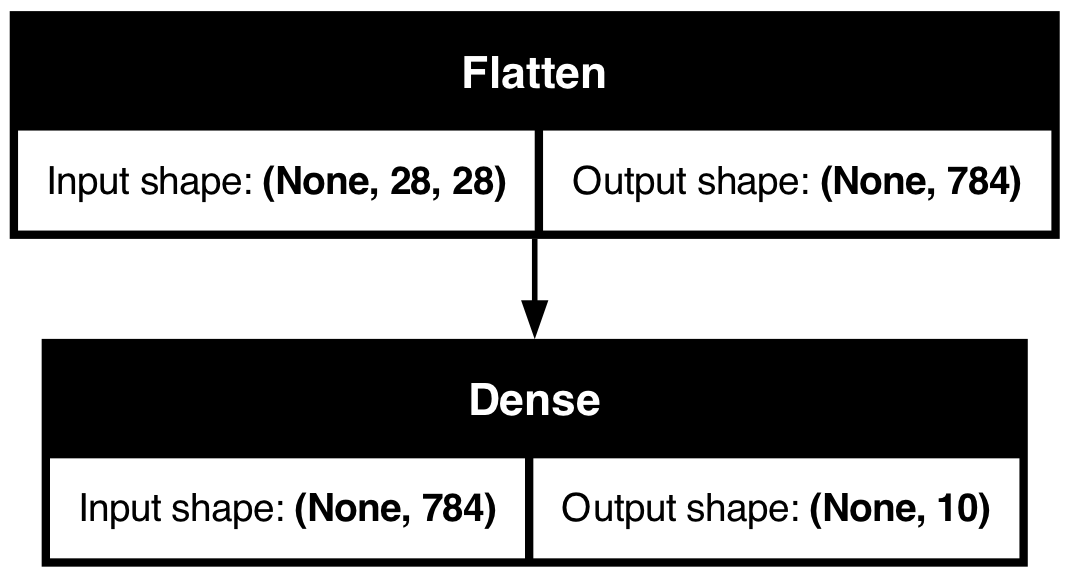

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.6906 - loss: 24.1765 - val_accuracy: 0.7059 - val_loss: 19.0078
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.7822 - loss: 12.4331 - val_accuracy: 0.7977 - val_loss: 11.6179
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.7921 - loss: 11.7669 - val_accuracy: 0.7922 - val_loss: 13.3571
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.8013 - loss: 11.4183 - val_accuracy: 0.7994 - val_loss: 11.1212
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.8000 - loss: 10.4122 - val_accuracy: 0.7183 - val_loss: 19.5395


In [24]:
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[ -232.24004  ,  -603.9339   ,  -127.084335 ,  -218.82271  ,
         -258.89536  ,   280.66574  ,    73.64697  ,   259.36456  ,
          201.67673  ,   742.8343   ],
       [  413.2021   ,  -291.89374  ,   367.27423  ,   151.72067  ,
          -89.31314  , -1309.1443   ,   364.5198   , -1627.9543   ,
           -7.5369887,  -862.2307   ],
       [  140.13185  ,    94.83442  ,   168.59691  ,   169.58185  ,
          103.6022   ,  -560.89825  ,   159.52718  ,  -434.81494  ,
          -24.7783   ,  -238.7337   ],
       [  224.06236  ,   101.4296   ,   314.57443  ,   234.69855  ,
          108.79857  ,  -767.0437   ,   288.9107   ,  -779.1392   ,
          -62.052513 ,  -670.3978   ],
       [  207.14432  ,   233.09901  ,   252.69807  ,   284.68033  ,
          188.6559   ,  -995.05493  ,   252.17311  ,  -750.6955   ,
           69.59023  ,  -769.1261   ],
       [  249.14331  ,  -110.19609  ,   547.3062   ,   156.08409  ,
          253.24382  ,  -883.5585   ,   430.24176  , -138

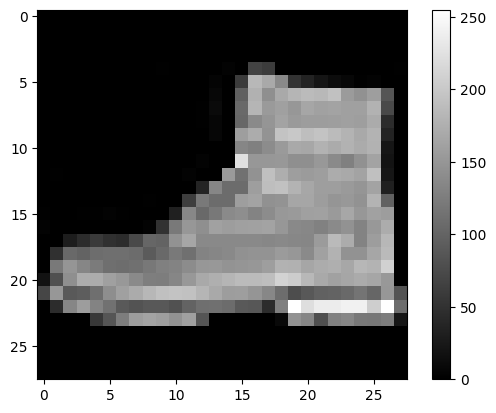

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


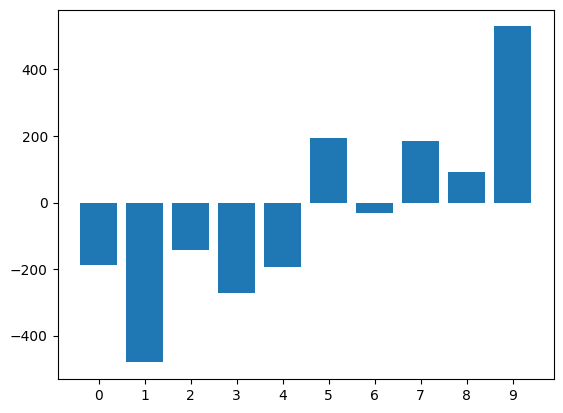

correct answer: 9


In [25]:
data_idx = 8676 
plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])